In [9]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import KernelPCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [10]:
clf = Pipeline([("kpca", KernelPCA(n_components=2)), ("log_reg", LogisticRegression())])

In [13]:
params = [{"kpca_gamma": np.linspace(0.03, 0.05, 10), "kpca_kernel": ["rbf", "sigmoid"]}]

In [14]:
grid_search = GridSearchCV(clf, params, cv=3)

### Excercise9

In [30]:
# Load the MNIST dataset and split into training and testing set
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split

data = fetch_mldata('MNIST original')
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [34]:
# Train a random forest classifier and time how long
from sklearn.ensemble import RandomForestClassifier
import time

rf_clf = RandomForestClassifier()
start_time = time.time()
rf_clf.fit(X_train, y_train)
print("--- %s seconds ---" %(time.time()-start_time))

--- 9.316556930541992 seconds ---


In [39]:
# Use PCA to reduce dimensionality, with explained varaince of 95%
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [45]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [44]:
X_train_pca.shape

(56000, 154)

In [41]:
rf_clf_reduced = RandomForestClassifier()

In [42]:
# Train random forest on reduced dataset, time the training
start_time = time.time()
rf_clf_reduced.fit(X_train_pca, y_train)
print("--- %s seconds ---" %(time.time() - start_time))

--- 10.746336460113525 seconds ---


In [47]:
# Compare performance on test set
from sklearn.metrics import accuracy_score

y_pred1 = rf_clf.predict(X_test)
y_pred2 = rf_clf_reduced.predict(X_test_pca)

accuracy_score(y_pred1, y_test)

0.9473571428571429

In [48]:
accuracy_score(y_pred2, y_test)

0.89828571428571424

From the above result we could see that, dimensionality reduction is not important for speed of random forest

### Excercise10: MNIST data visualization

In [88]:
# use t-SNE to reduced the dimension of MNIST data
from sklearn.manifold import TSNE

index_tmp = np.random.permutation(1000)
index = index_tmp[:500]

X_visu_ori = X_train[index, :]
target_visu = y_train[index]

In [89]:
# Transform with t-SNE
tsne_mnist = TSNE(n_components=2)
X_visu_tsne = tsne_mnist.fit_transform(X_visu_ori)

In [91]:
# Transform with PCA
pca_mnist = PCA(n_components=2)
X_visu_pca = pca_mnist.fit_transform(X_visu_ori)

In [93]:
# Transform with LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LDA_mnist = LinearDiscriminantAnalysis(n_components=2)
X_visu_LDA = LDA_mnist.fit_transform(X_visu_ori, target_visu)

/usr/local/lib/python3.5/dist-packages/sklearn/discriminant_analysis.py:455: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


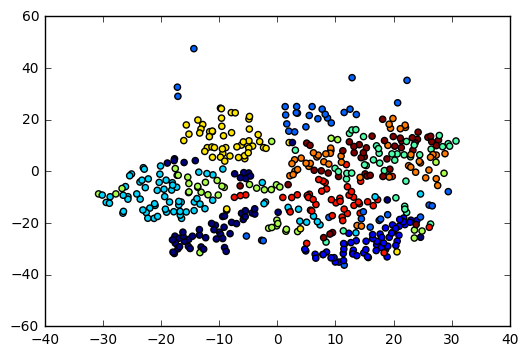

In [95]:
# Visualize with matplotlib

import matplotlib.pyplot as plt
% matplotlib inline

plt.scatter(X_visu_tsne[:,0],X_visu_tsne[:,1], c=target_visu)

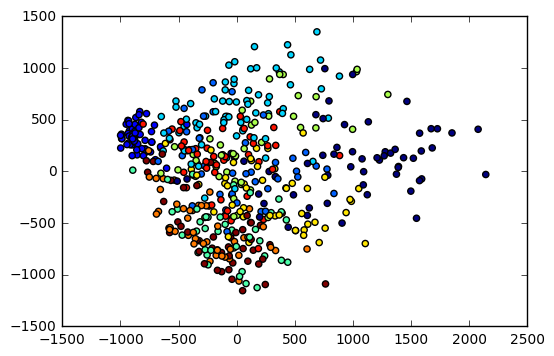

In [96]:
plt.scatter(X_visu_pca[:,0],X_visu_pca[:,1], c=target_visu)

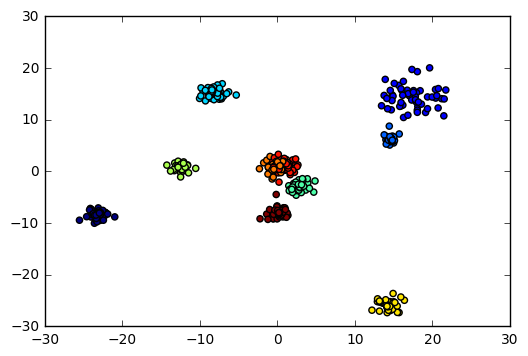

In [97]:
plt.scatter(X_visu_LDA[:,0],X_visu_LDA[:,1], c=target_visu)

### Towards a  clear understanding of PCA in sklearn

Let's recap principle component analysis from various perspective.

